# LDA (Latent Dirichlet Allocation)

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# gensim
import gensim
from gensim.utils import simple_preprocess
from gensim.matutils import sparse2full
from gensim.models import LdaModel
from gensim import corpora
from gensim.corpora import Dictionary
# libraries for lemmatization
import nltk
from nltk.corpus import stopwords

from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')

from nltk.stem.porter import *
import spacy

# Visualize the topics
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as gensimivis

# evaluate
from sklearn.metrics import f1_score

Load the preprocessed text file. The file is separated into category and string(texts).

In [503]:
# Load the preprocessed CSV file into a Pandas DataFrame
df = pd.read_csv('/Users/xinyu/Downloads/cleaned_strings - cleaned_strings.csv',encoding='latin-1')

In [504]:
# Overview of the document
print(df.head(2))
print(len(df))
print('Category')
print(len(df.groupby('category')))

   Unnamed: 0  category                                             string
0           0  business  quarterly profits media giant timewarner jumpe...
1           1  business  dollar hit highest level euro almost months fe...
2225
Category
5


First, we need to perform tokenization, that is to split each document into a list of tokens (words) for further processing.

In [505]:
# Tokenize the text column
df['tokenized_texts'] = df['string'].apply(lambda x: simple_preprocess(x))
tokenized_texts = list(df['tokenized_texts'])
#print(tokenized_texts[:1])

For further preprocessing, we lemmatize the tokens. This step reduces words to their base or dictionary form, which is called a lemma.

In [506]:
# lemmatize the tokens
lemmatizer = WordNetLemmatizer()
df['lemmatized_tokens'] = df['tokenized_texts'].apply(lambda x: [lemmatizer.lemmatize(token) for token in x])
data_lemmatized = list(df['lemmatized_tokens'])
print(data_lemmatized[:1])

[['quarterly', 'profit', 'medium', 'giant', 'timewarner', 'jumped', 'bn', 'month', 'december', 'yearearlier', 'firm', 'biggest', 'investor', 'google', 'benefited', 'sale', 'highspeed', 'internet', 'connection', 'higher', 'advert', 'sale', 'timewarner', 'fourth', 'quarter', 'sale', 'rose', 'bn', 'bn', 'profit', 'buoyed', 'oneoff', 'gain', 'offset', 'profit', 'dip', 'warner', 'bros', 'le', 'user', 'aol', 'warner', 'friday', 'owns', 'searchengine', 'google', 'own', 'internet', 'business', 'aol', 'mixed', 'fortune', 'lost', 'subscriber', 'fourth', 'quarter', 'profit', 'lower', 'preceding', 'quarter', 'however', 'company', 'aols', 'underlying', 'profit', 'exceptional', 'item', 'rose', 'stronger', 'internet', 'advertising', 'revenue', 'hope', 'increase', 'subscriber', 'offering', 'online', 'service', 'free', 'timewarner', 'internet', 'customer', 'try', 'sign', 'aols', 'existing', 'customer', 'highspeed', 'broadband', 'timewarner', 'restate', 'result', 'following', 'probe', 'security', 'excha

At next step, we need to create a dictionary and bag of words corpus from the preprocessed documents.

In [507]:
# Create a bag-of-words representation of the preprocessed documents
dictionary = gensim.corpora.Dictionary(data_lemmatized)
dictionary.filter_extremes(no_below=10, no_above=0.5, keep_n=50000)
corpus = [dictionary.doc2bow(doc) for doc in data_lemmatized]

Now, we can train the LDA model. Since we know we have five topics, we set the topic number 5. 

In [508]:
# Train the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)

In [509]:
# Print the topics and the most significant words for each topic (business, politics, sports, entertainment, tech):
lda_model.show_topics(5,10)

[(0,
  '0.014*"game" + 0.009*"technology" + 0.008*"music" + 0.007*"phone" + 0.006*"search" + 0.006*"pc" + 0.006*"mobile" + 0.005*"system" + 0.005*"device" + 0.005*"computer"'),
 (1,
  '0.013*"game" + 0.007*"film" + 0.006*"world" + 0.005*"year" + 0.005*"play" + 0.005*"player" + 0.004*"award" + 0.004*"win" + 0.004*"england" + 0.003*"star"'),
 (2,
  '0.011*"software" + 0.010*"user" + 0.009*"net" + 0.009*"firm" + 0.009*"computer" + 0.008*"company" + 0.008*"site" + 0.007*"security" + 0.007*"network" + 0.007*"program"'),
 (3,
  '0.008*"government" + 0.006*"bn" + 0.005*"minister" + 0.005*"party" + 0.004*"labour" + 0.004*"company" + 0.004*"country" + 0.004*"election" + 0.004*"public" + 0.004*"plan"'),
 (4,
  '0.019*"mobile" + 0.016*"service" + 0.013*"technology" + 0.012*"digital" + 0.012*"phone" + 0.012*"tv" + 0.011*"music" + 0.010*"broadband" + 0.008*"uk" + 0.007*"player"')]

The above displays the top 10 most important words for each of the 5 topics learned by the model. We have topics: tech, sports, business, politics, entertainment. According to the above distribution, we assign these five topics as with numbers 0,1,2,3,4, respectively.

We can visualize our model using the interactive plot below.

In [510]:
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary=dictionary)
pyLDAvis.display(vis)

/Users/xinyu/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/xinyu/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/xinyu/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/xinyu/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/xinyu/opt/anaconda3/lib/python3.9/

PyLDAvis allows us to interpret the topics in our model. 
Each circle represents a topic of news. The size of the circles indicate the percentage of words about that news topic. Without selecting any cirles, the bars on the right show the overall frequency of the terms in the corpus. From the plot above, we observe that term such as "game", "government", "company", "uk" and "firm" are with high frequency. 

When we select a circle, the red bars on the right show the estimated number of times that the terms appears in a topic. Take circle 2 as an example, when we select it, the bar plot will change to:
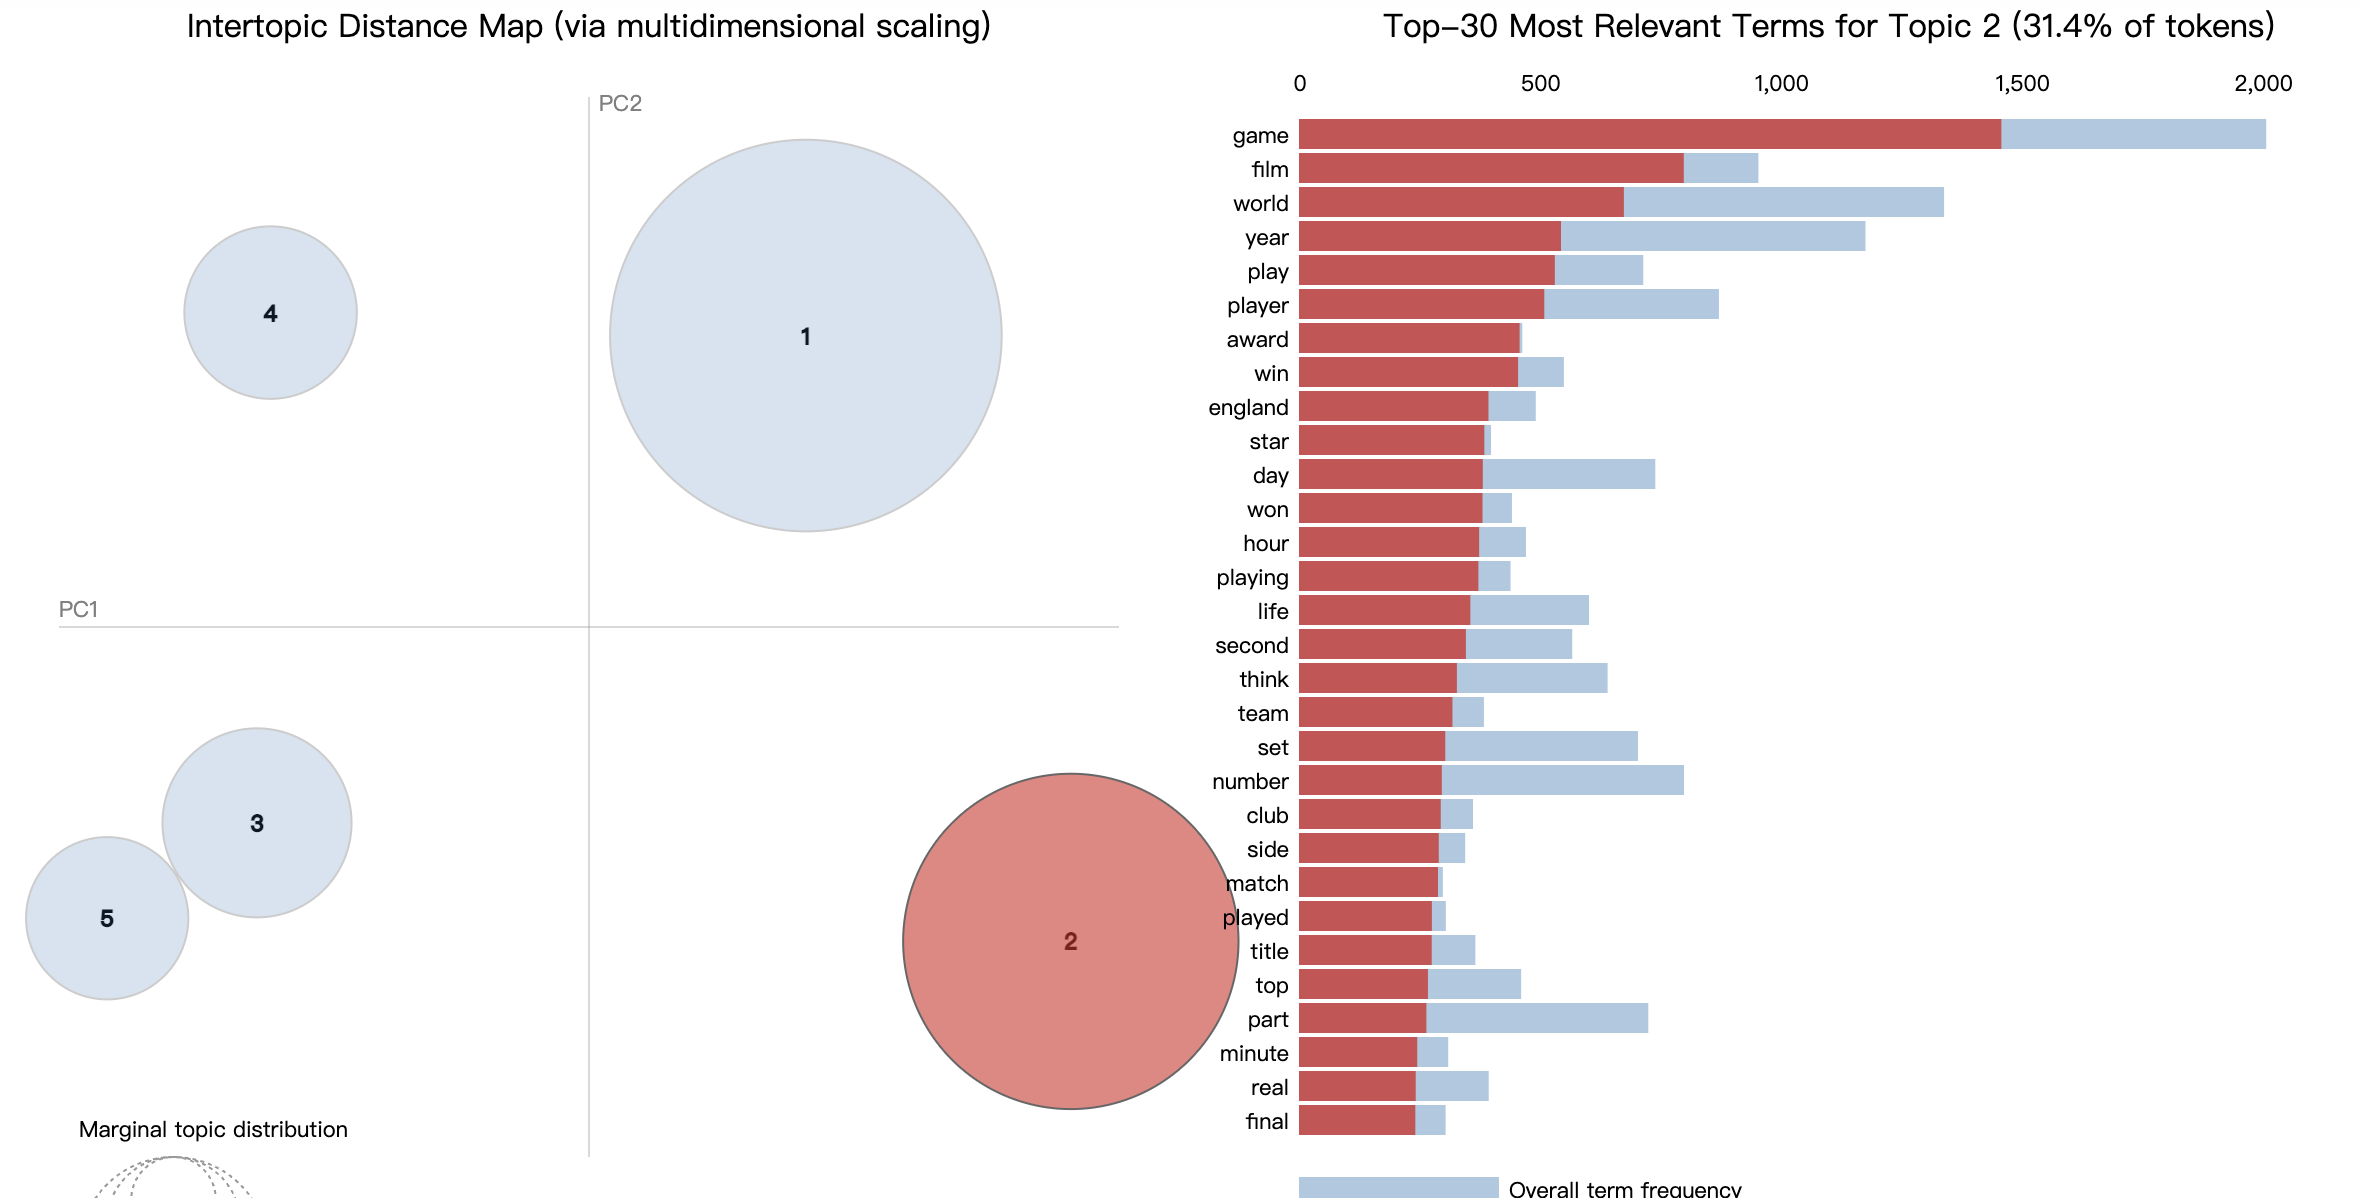
According to the words on the top of the list ("game","player",and "win") we can infer circle 2 represent the topic of sports. 
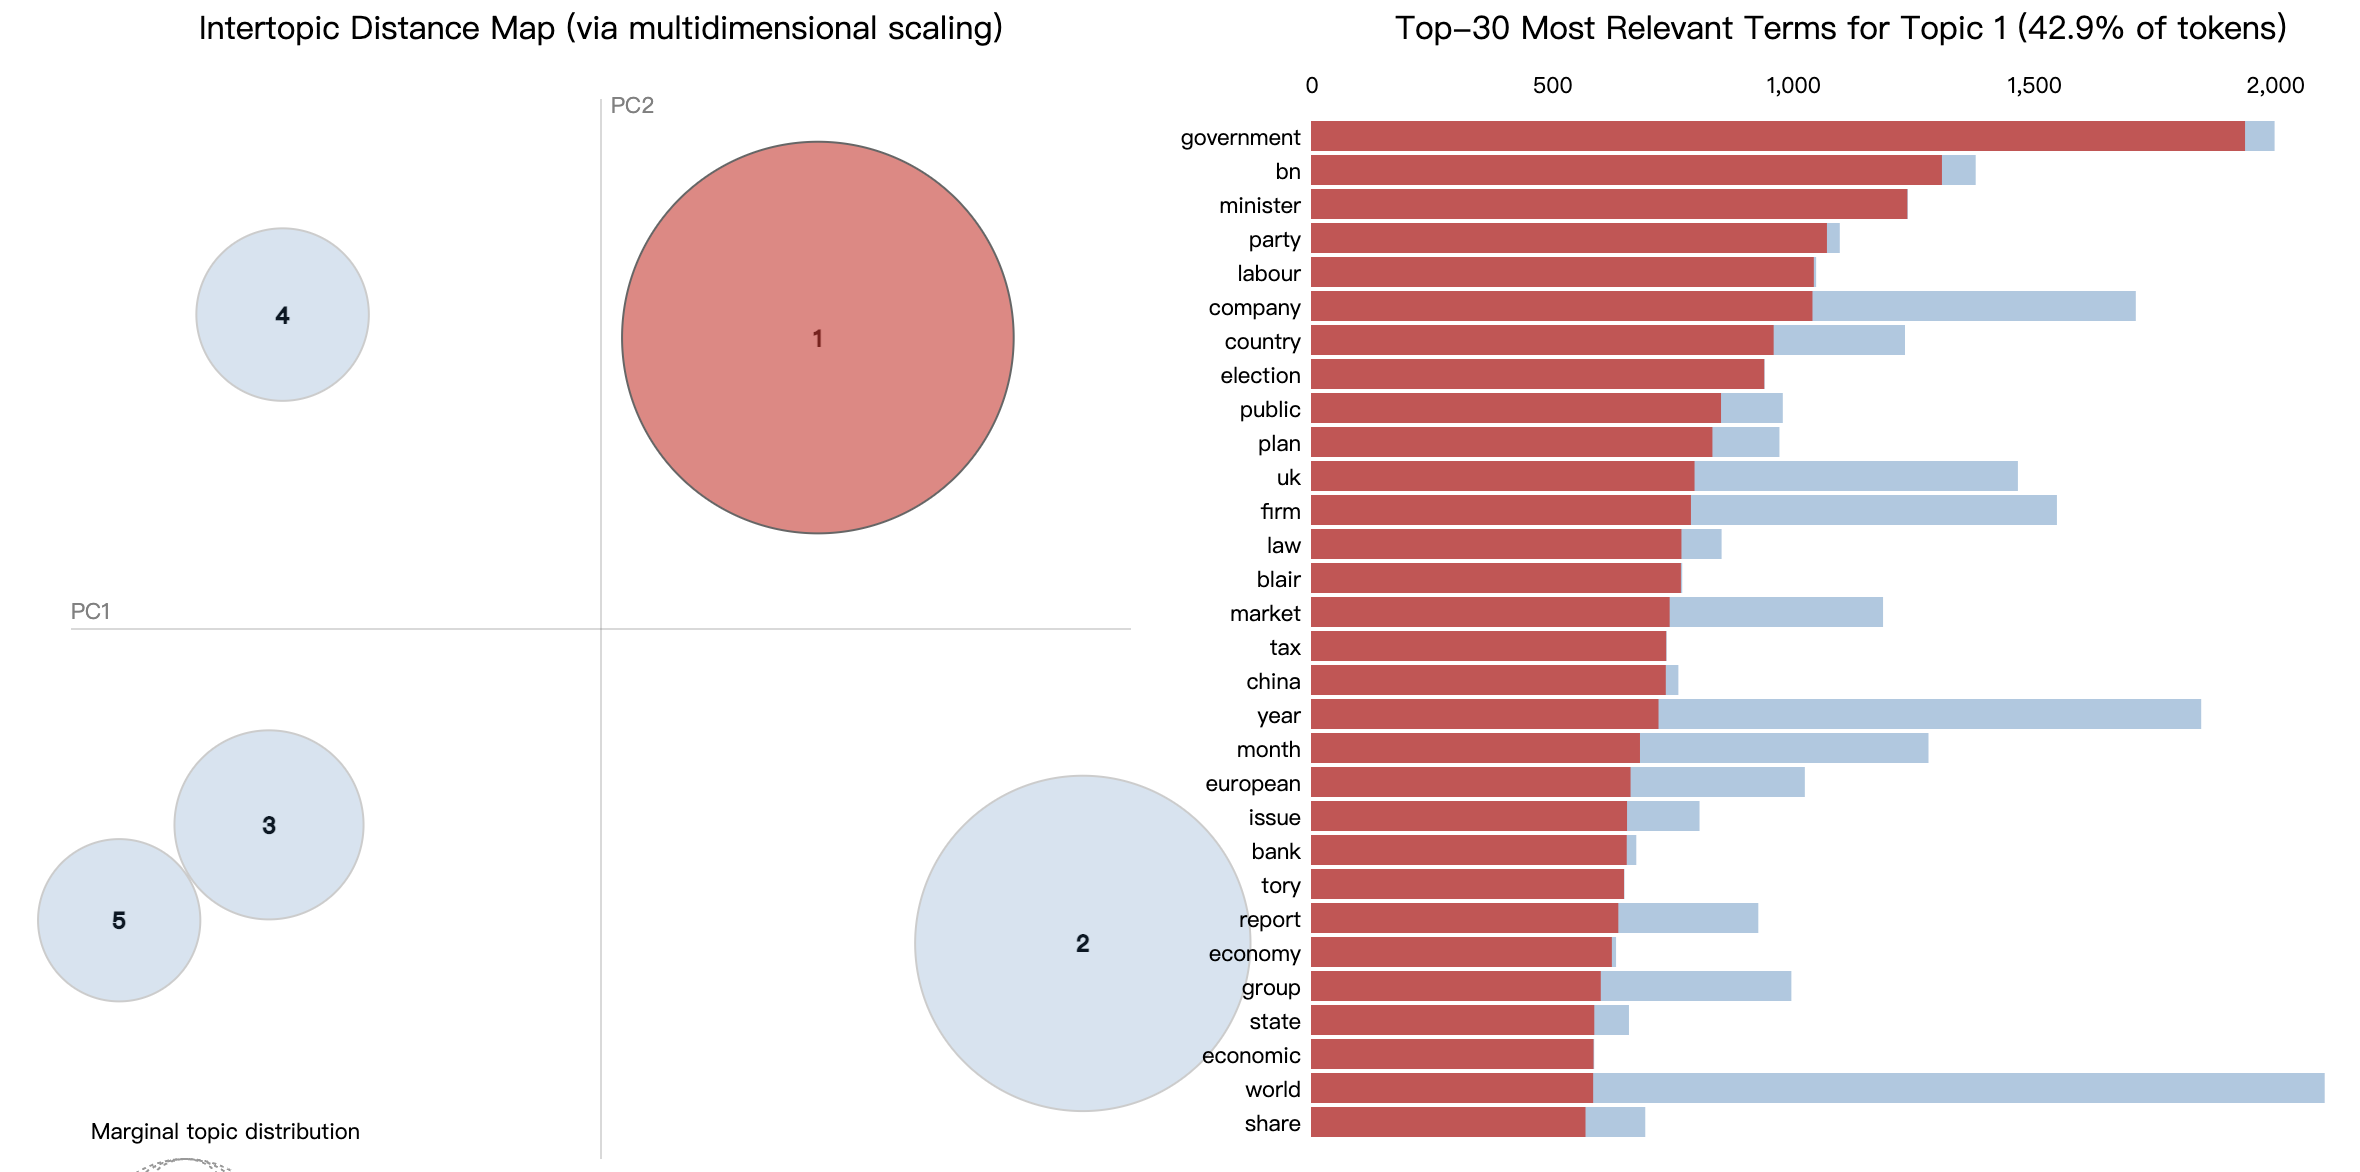
And the first circle is very likely to represent the topic of politics because of the dominating word "government", "minister","party" and "election".
The distance between the circles tells how different the topics are. Again, circle 1(politics) and circle 2(sport) are not very related, so they are somehow far away from each other. While, for circle 3 and 4, if we select them and see the high frequency words, we may guess either of them is "entertainment" and another is "tech". They are close to each other, and nowadays, "tech" and "entertainment" are closely related, too.

We can also select the words beside the bars. Then the size of the circles will vary. If a circle is large, it means that the word we selected dominates the topic that the circle represents. For example, when we select the word "game", the plot shows
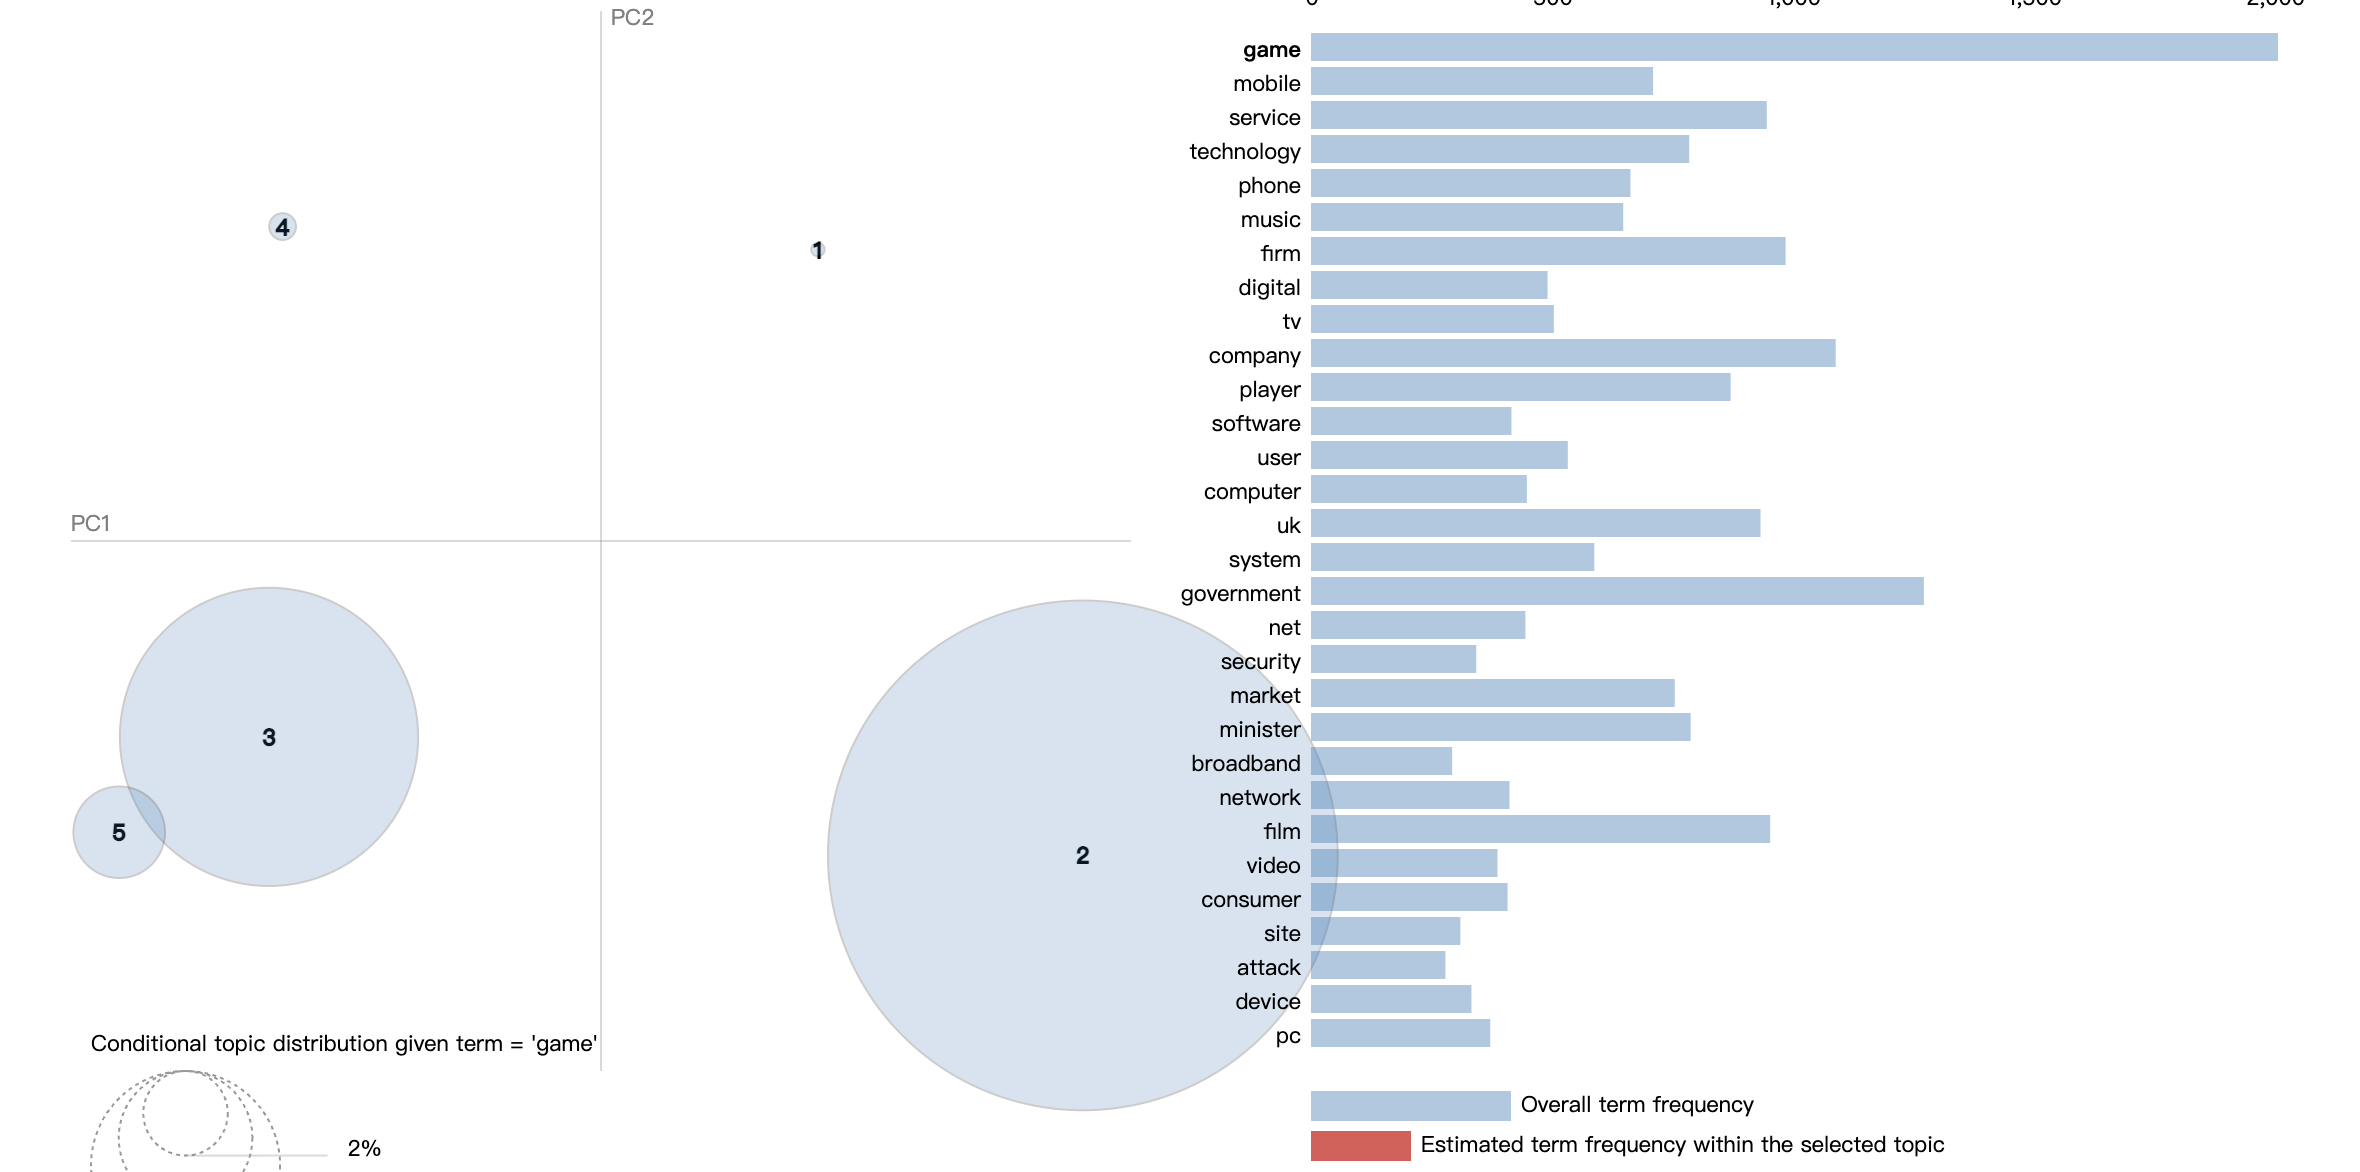
And we find that "game" is dominating circle 2 and 3. Hence, we can also infer circle 3 represents "entertainment".

Then we want to test the accuracy of our model with the test data.

In [511]:
# Evaluate the model
# We separate the corpus for training and testing, so that they are preprocessed in the same way.
train_corpus = corpus[:int(0.9 * len(corpus))]
test_corpus = corpus[int(0.1 * len(corpus)):]

lda_model = LdaModel(corpus=train_corpus, id2word=dictionary, num_topics=5)

Perplexity score can give us an idea of how well the model can predict a sample of new data. The lower the better our model is.

In [512]:
# Evaluate the model using the testing set
perplexity = lda_model.log_perplexity(test_corpus)
print("Perplexity Score: ", perplexity)

Perplexity Score:  -8.138993927442277


We also want to use the model to classify new test data. 

In [540]:
# classify unseen data
tdf = pd.read_csv('/Users/xinyu/Downloads/articles_test_90_10.csv',encoding='latin-1')
# follow the same preprocessing steps
# Tokenize the text column
tdf['tokenized_ttexts'] = tdf['string'].apply(lambda x: simple_preprocess(x))
tokenized_test_texts = list(tdf['tokenized_ttexts'])
# lemmatize
lemmatizer = WordNetLemmatizer()
tdf['lemmatized_tokens'] = tdf['tokenized_ttexts'].apply(lambda x: [lemmatizer.lemmatize(token) for token in x])
test_lem = list(tdf['lemmatized_tokens'])
# dictionary
dictionary = gensim.corpora.Dictionary(test_lem)
testcorpus = [dictionary.doc2bow(doc) for doc in test_lem]

In [541]:
print(len(tdf.groupby('category')))
print(len(tdf))

5
223


According to the word distribution generated by the trained model,  we manually convert categories to numbers so that they can be consistent with the topics classified by the model. 

In [542]:
# convert categories to numbers
label2id = {'tech': 0, 'sport': 1, 'business': 2, 'politics': 3, 'entertainment': 4}
true_labels = testdf['category']
true_labels_num = [label2id[label] for label in true_labels]

print(true_labels_num)


[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [543]:
# Transform the preprocessed unseen test data into topic probability distributions
topic_probs = lda_model.get_document_topics(testcorpus)

Using the trained model, we get the predicted topics of the new data.

In [544]:
# Choose the most probable topic for each document
predicted_topics = [max(tp, key=lambda x: x[1])[0] for tp in topic_probs]
print(predicted_topics)

[1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 3, 4, 0, 3, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 2, 2, 3, 3, 0, 0, 0, 3, 3, 3, 3, 2, 0, 3, 0, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 2, 0, 2, 0, 2, 3, 2, 3, 3, 0, 3, 0, 0, 0, 0, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 0, 4, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 2, 0, 3, 3, 3]


In [545]:
print(accuracy)

0.23318385650224216


In [546]:
# Compute precision, recall, and F1 score
f1 = f1_score(true_labels_num, predicted_topics, average='macro')

In [547]:
print(f1)

0.11732979370610033


We find the performance for classifying new data is not good, with an accuracy of around 23% and a f1 score 0.12. Maybe this is due to the size of the data, the data preprocessing, and the hyperparameter in our model. 

F1 score is a machine learning evaluation metric that measures a model's accuracy. Here we combine the true labels with the predicted topics. And the score computes the number of times of correct prediction. The idea of using F1 score is based on this article[Using LDA Topic Models as a Classification Model Input](https://towardsdatascience.com/unsupervised-nlp-topic-models-as-a-supervised-learning-input-cf8ee9e5cf28).